## Load Data

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
dir_path = os.path.realpath('..')

In [4]:
path = 'data/raw/train.csv'

full_path = os.path.join(dir_path, path)
df = pd.read_csv(full_path, header=0, index_col=0)
print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 95851 rows, 7 columns.


In [6]:
target = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df['none'] = 1-df[target].max(axis=1)
df['total'] = df[target].sum(axis=1)

In [7]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,none,total
id,,,,,,,,,
22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,0,1
27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,1,0
54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,1,0
77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,1,0
79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,1,0


In [8]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none,total
count,95851.000000,95851.000000,95851.000000,95851.000000,95851.000000,95851.000000,95851.000000,95851.000000
mean,0.096368,0.010068,0.053301,0.003182,0.049713,0.008492,0.897862,0.221124
std,0.295097,0.099832,0.224635,0.056320,0.217352,0.091762,0.302831,0.750533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


## Summary statistics

/home/ec2-user/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


toxic            0.096368
obscene          0.053301
insult           0.049713
severe_toxic     0.010068
identity_hate    0.008492
threat           0.003182
dtype: float64


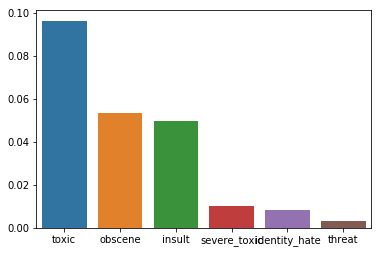

In [9]:
# Calculate means
mean = df[target].mean().sort_values(ascending=False)
 
# Barplot
sns.barplot(x=mean.index, y=mean.values)
print(mean)

## Correlations between labels

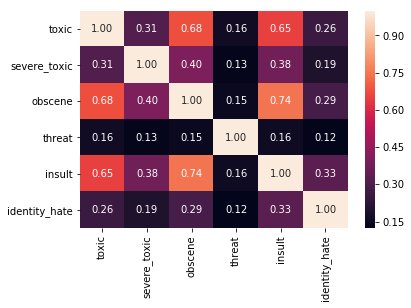

In [10]:
# Calculate correlations
corr = df[target].corr()
 
# Heatmap
sns.heatmap(corr, annot=True, fmt='.2f')

## Count of uppercase words (proxy for 'shouting')

In [11]:
from collections import Counter
df['processed'] = df['comment_text'].str.split()
df['uppercase_count'] = df['processed'].apply(lambda x: sum(1 for t in x if t.isupper() and len(t)>2))

(0, 200)

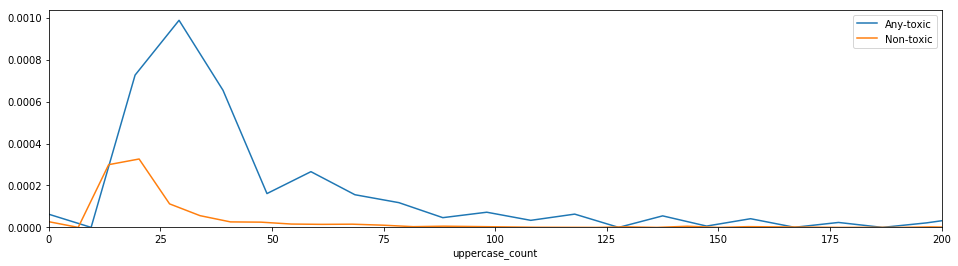

In [36]:
fig, ax = plt.subplots(figsize=(16,4))
x= df[df['none']==0]['uppercase_count']
sns.distplot(x, ax=ax, hist=False, label='Any-toxic')
x= df[df['none']==1]['uppercase_count']
sns.distplot(x, ax=ax, hist=False, label='Non-toxic')
# x= df[df['toxic']==1]['uppercase_count']
# sns.distplot(x, ax=ax, hist=False, label='Toxic')
# x= df[df['severe_toxic']==1]['uppercase_count']
# sns.distplot(x, ax=ax, hist=False, label='Severe Toxic')
# x= df[df['threat']==1]['uppercase_count']
# sns.distplot(x, ax=ax, hist=False, label='Threat')
ax.set_xlim([0, 200])

## Count of bad words

In [57]:
path = 'data/external/badwords.txt'
bad_words = []
f = open(os.path.join(dir_path, path), mode='rt', encoding='utf-8')
for line in f:
    words = line.split(', ')
    for word in words:
        word = word.replace('\n', '')
        bad_words.append(word)
# bad_words = f.read().splitlines()
f.close()

In [58]:
bad_words

['ahole',
 'asshole',
 'anus',
 'ash0le',
 'asshole',
 'ash0les',
 'asshole',
 'asholes',
 'asshole',
 'ass',
 'Ass Monkey',
 'asshole',
 'Assface',
 'asshole',
 'assh0le',
 'asshole',
 'assh0lez',
 'asshole',
 'asshole',
 'assholes',
 'assholz',
 'asshole',
 'asswipe',
 'asshole',
 'azzhole',
 'asshole',
 'bassterds',
 'basterd',
 'bastard',
 'bastards',
 'bastardz',
 'basterd',
 'basterds',
 'basterd',
 'basterdz',
 'basterd',
 'Biatch',
 'bitch',
 'bitch',
 'bitches',
 'bitch',
 'Blow Job',
 'blowjob',
 'boffing',
 'butthole',
 'asshole',
 'buttwipe',
 'asshole',
 'c0ck',
 'cock',
 'c0cks',
 'cock',
 'c0k',
 'cock',
 'Carpet Muncher',
 'cawk',
 'cock',
 'cawks',
 'cock',
 'Clit',
 'cnts',
 'cunt',
 'cntz',
 'cunt',
 'cock',
 'cockhead',
 'cock',
 'cock-head',
 'cock',
 'cocks',
 'CockSucker',
 'cock-sucker',
 'cocksucker',
 'crap',
 'cum',
 'cunt',
 'cunts',
 'cuntz',
 'cunt',
 'dick',
 'dild0',
 'dildo',
 'dild0s',
 'dildo',
 'dildo',
 'dildos',
 'dilld0',
 'dildo',
 'dilld0s',
 'd

## Output

In [102]:
features = df.drop(['none', 'total', 'processed'], axis=1)

In [104]:
features.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,uppercase_count
id,,,,,,,,
22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,0
27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,0
54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,0
77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,0
79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,0


In [105]:
path = 'data/processed/features.csv'
full_path = os.path.join(dir_path, path)
features.to_csv(full_path, header=True, index=True)

## Misc

In [34]:
print(df[df['total'] == 1])

                                                   comment_text  toxic  \
id                                                                       
22256635      Nonsense?  kiss off, geek. what I said is true...      1   
225701312     Why hasn't Alitalia been removed rom the allia...      1   
293668009     "\nThe Graceful Slick....\nIs non other than a...      1   
341549388     "\n\n Stupid? \n\nAs soon as I saw the phrase ...      1   
407636870                           Are you gay?? Sound like it      1   
659300233     and in the program on last night Crime Museum:...      1   
839277218     "\n\nI didn't call you a ""biased backward yan...      1   
955104481     HE THINKS THEY ARE COPYRIGHT VIOLATION. PITY H...      1   
1229646808    "\n\nWow, you're a little touchy aren't you? Y...      1   
1512938791    COINCIDENCE? \n\nHave you noticed that in ever...      1   
1590833599    For the last time, Turkish people ARE NOT WHIT...      1   
2302694137            u aint got no pa